### 关于数据可视化是一个既简单有困难的课，之前我i一阵子都处于一个懂得简单的可视化工具，但是难一点的没有接触也不会，这次系统搞一下


### import matplotlib.pyplot as plt  
### 传统的基础绘图都是用这个工具工具包
### 但是这里讲的matplotlib有三个层次的API：
- matplotlib.backend_bases.FigureCanvas  代表绘图区，所有的图像都是在绘图取完成的
- matplotlib.backend_bases.Renderer 代表了渲染器，可以近似的理解为画笔，控制如何在FigureCanvas上画图
- matplotlib.artist.Artist代表了具体的图标组件，及调用了Renderer的接口在Canvas上作图
#### 前两者处理处理程序和计算机的底层交互事项，带三项Artist就是具体的调用接口来做出我们想要的图形、文本、线条的设定。所以通常来说，大多数情况下都是用artist

## artist的分类
### artist有两种基本类型，primitives和containers
- primitive是基本要素，它包含一些我们想要在绘图区用得到的标准图像对象，曲线Line2D，文字text，矩形Rectangle，图像image等
- container是容器，用来装基本要素的地方，包括图形figure、坐标系axes和坐标轴axis。
### 类似的图形属性在matplotlib.pyplot中是以plt.figure,x-label，title等来设置的

### 关于matplotlib的标准用法
#### 使用流程为
- 创建一个Figure实例
- 使用Figure实例创建一个或者多个Axes或Subplot实例
- 使用Axes实例的辅助方法来创建primitive
#### 这里的Axes是一个容器，是matplotlibAPI中最重要的类，并且大多数时间都在处理它
#### 关于matplotlib.pyplot中画图的流程
- 传入数据，设置图像大小
- 选择图像类型绘制图像
- 设置x轴y轴标签，标题
- 设置网格等辅助属性

<class 'list'>
<class 'matplotlib.figure.Figure'>


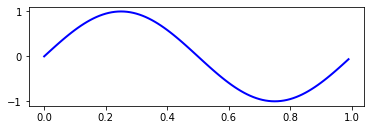

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# 设置图像大小，这里也可以理解为第一步创建一个figure实例
fig=plt.figure()

# 创建绘图区
ax=fig.add_subplot(2,1,1)

# 使用Axes实例方法话一条曲线
t=np.arange(0.0,1.0,0.01)
s=np.sin(2*np.pi*t)
line=ax.plot(t,s,color='blue',lw=2)
# plot是曲线图
print(type(line))
print(type(fig))

## Artist对象
### 图形中的每一个元素都对应着一个matplotlib.Artist，且都有对应的配置属性列表
- Figure本身包含一个Rectangle，Rectangle的大小就是Figure的大小，也可以用来设置Figure的背景色和透明度
- Axes的边界框也可以进行设置
- Axes.path的属性：也是一个Rectangle，代表了绘图坐标轴内的矩形框，通过它可以设置Axes的颜色、透明度
#### 每个matplotlib Artist都有一下属性
- .alpha属性 ：透明度，0到1之间
- .axes属性：返回这个Artist所属的Axes，可能为none
- .figure属性：改Artist的所属的Figure，可能为none
- .label：一个text label
- .visibel:布尔值，控制Artist是否绘制

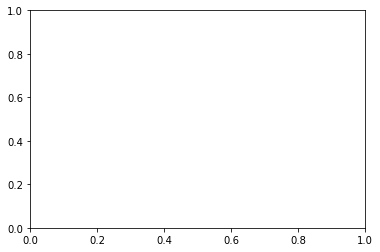

In [4]:
# 简单展示图像框和坐标轴
plt.figure().patch
plt.axes().patch

### 属性调用方式
#### 这里的调用方法让我想起了面向对象的方法调用，私有属性都是通过get_和set_函数进行获取和修改的
#### 这里设置属性的时候可以一次设置多个，

In [20]:
a=fig.get_alpha()
print(type(a))
print(a)
fig.set_alpha(0.5*a)
# 这个地方不太明白，属性调用不就是绘制的土坯那及逆行调用吗？上方绘制的图片fig

AttributeError: 'NoneType' object has no attribute 'get_alpha'

In [21]:
import matplotlib 
matplotlib.artist.getp(fig.patch)

    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor or ec = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = False
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTra...
    transfo

## 基本元素
### Artist包含两种对象：基本要素-primitives 和 容器-containers。primitives是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文本text，矩形Rectangle，图像image等。container是容器，即用来装基本要素的地方，包括图形figure、坐标系Axes和坐标轴Axis。
- 2DLines

- xdata:需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)
- ydata:需要绘制的line中点的在y轴上的取值
- linewidth:线条的宽度
- linestyle:线型
- color:线条的颜色
- marker:点的标记，详细可参考markers API 1
- markersize:标记的size

### 设置线条的粗细

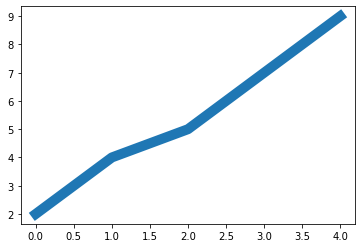

In [25]:
import matplotlib.pyplot as plt
x=range(0,5)
y=[2,4,5,7,9]
plt.plot(x,y,linewidth=10)

### 设置线条锯齿

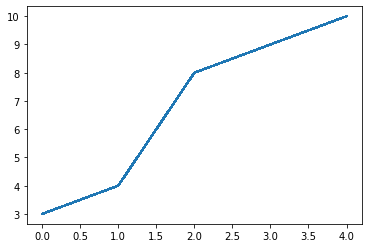

In [28]:
x = range(0,5)
y = [3,4,8,9,10]
line, = plt.plot(x, y, '-')
line.set_antialiased(False)  

### 使用setp()函数设置

[None, None]

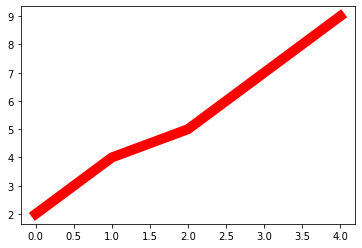

In [29]:
x=range(0,5)
y=[2,4,5,7,9]
lines = plt.plot(x, y)
plt.setp(lines,color='r',linewidth=10)

### 绘制直线的两种方法
- pyplot
- Line2D"

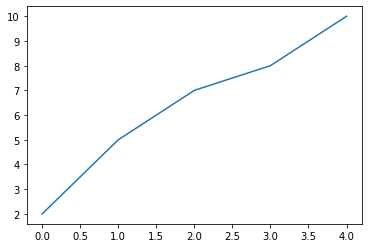

In [30]:
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y)

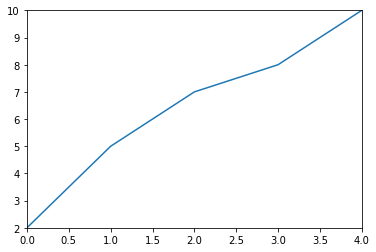

In [31]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      

# 创建一个实例
fig = plt.figure()
# 设置图片的参数
ax = fig.add_subplot(111)
# 传入数据
line = Line2D(x, y)
ax.add_line(line)
# x轴的坐标
ax.set_xlim(min(x), max(x))
# y轴的坐标
ax.set_ylim(min(y), max(y))
# 展示图片
plt.show()

### errorbar绘制误差折线图 -这是一个专门绘制误差线的功能

- x：需要绘制的line中点的在x轴上的取值
- y：需要绘制的line中点的在y轴上的取值
- yerr：指定y轴水平的误差
- xerr：指定x轴水平的误差
- fmt：指定折线图中某个点的颜色，形状，线条风格，例如‘co–’
- ecolor：指定error bar的颜色
- elinewidth：指定error bar的线条宽度

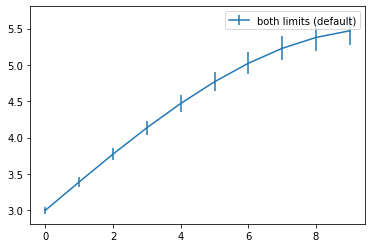

In [36]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
# 随机生成10个数
y = 2.5 * np.sin(x / 20 * np.pi)
# 在0.05到0.2之间均匀的返回10个数
yerr = np.linspace(0.05, 0.2, 10)
# 画图： 传入x、y还有误差值
plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
plt.legend()  # 显示图例

### hist-直方图

- x: 数据集，最终的直方图将对数据集进行统计
- bins: 统计的区间分布
- range: tuple, 显示的区间，range在没有给出bins时生效
- density: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
- histtype: 可选{‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
- align: 可选{‘left’, ‘mid’, ‘right’}之一，默认为’mid’，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
- log: bool，默认False,即y坐标轴是否选择指数刻度
- stacked: bool，默认为False，是否为堆积状图

(0.0, 100.0)

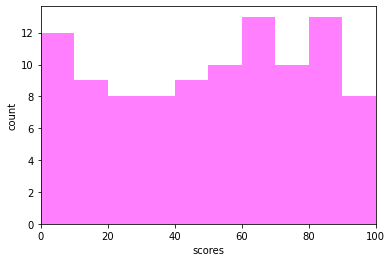

In [37]:
import matplotlib.pyplot as plt
import numpy as np 
x=np.random.randint(0,100,100) 
#生成[0-100)之间的100个数据,即 数据集 
bins=np.arange(0,101,10) 
#设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5)
#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(0,100)

### 使用Rectangle矩形绘制直方图

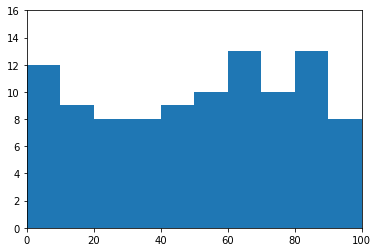

In [38]:
import pandas as pd
import re
df = pd.DataFrame(columns = ['data'])
df.loc[:,'data'] = x
df['fenzu'] = pd.cut(df['data'], bins=bins, right = False,include_lowest=True)

df_cnt = df['fenzu'].value_counts().reset_index()
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)

#用Rectangle把hist绘制出来
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
#rect1 = plt.Rectangle((0,0),10,10)
#ax1.add_patch(rect)

#ax2 = fig.add_subplot(212)
for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width'],df_cnt.loc[i,'fenzu'])
#rect2 = plt.Rectangle((10,0),10,5)
    ax1.add_patch(rect)
#ax1.add_patch(rect2)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)
plt.show()

### 后面的这种方法我没有细看，用的比较熟的也是上面的那种，也不觉得代码多会有什么非他不可的优点，后面再看看是不是非常有优势（这种方法）

### bar-柱状图，这里的柱状图是纵向的 ，在实际应用中还有横向的bar图降维常用barh，具体的案例我应该在task1中都有示例
- left：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串
- height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；这里的hight也可以设置barh柱的宽度，应位是横向的，所以用hight来设置
- alpha：透明度，值越小越透明
- width：为柱形图的宽度，一般这是为0.8即可；
- color或facecolor：柱形图填充的颜色；
- edgecolor：图形边缘颜色
- label：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

<BarContainer object of 16 artists>

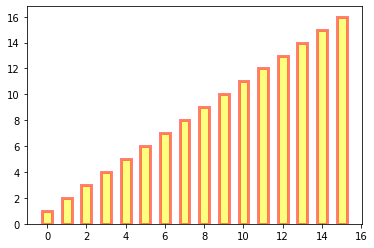

In [39]:
# 这是教程中给出的案例，理解一下还OK
import matplotlib.pyplot as plt
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3)

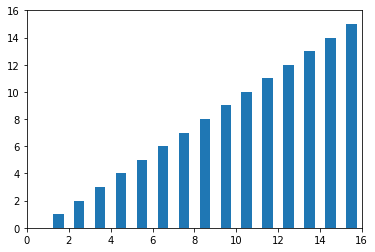

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect =  plt.Rectangle((i+0.25,0),0.5,i)
    ax1.add_patch(rect)
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16)
plt.show()

###  Polygon-多边形

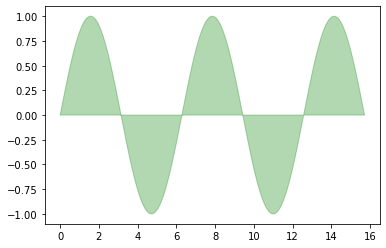

In [41]:
import matplotlib.pyplot as plt
x = np.linspace(0, 5 * np.pi, 1000) 
# 这里传入两个y值，两个sin函数没有重合，所以两者之间有空隙，将空隙填充，形成不规则图形
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y1, color = "g", alpha = 0.3)

### pie绘制饼状图

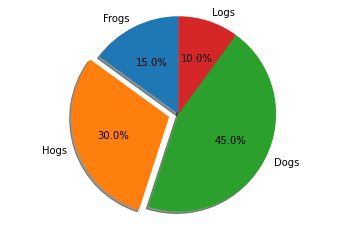

In [42]:
import matplotlib.pyplot as plt 
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.show()

### wedge绘制饼图

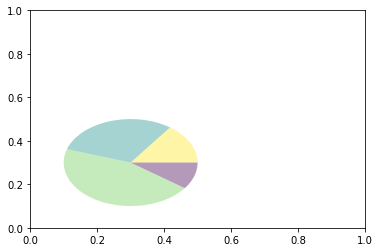

In [43]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

fig = plt.figure()
ax1 = fig.add_subplot(111)
theta1 = 0
sizes = [15, 30, 45, 10] 
patches = []
patches += [
    Wedge((0.3, 0.3), .2, 0, 54),             # Full circle
    Wedge((0.3, 0.3), .2, 54, 162),  # Full ring
    Wedge((0.3, 0.3), .2, 162, 324),              # Full sector
    Wedge((0.3, 0.3), .2, 324, 360),  # Ring sector
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax1.add_collection(p)
plt.show()

### scatter绘制散点图
#### 在task1中也有示例不再写代码了

###  images
#### images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像。
#### 使用imshow画图时首先需要传入一个数组，数组对应的是空间内的像素位置和像素点的值，interpolation参数可以设置不同的差值方法，具体效果如下。

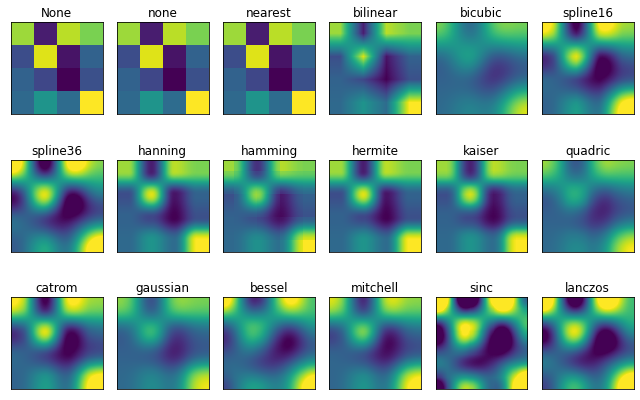

In [45]:
import matplotlib.pyplot as plt
import numpy as np
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# 随机生成4行4列的数组，
grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
# 设置x轴和y轴
# 
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')  
    # imshow是热力图，interpolation插值方式，cmap将标量数据映射到颜色的colormap实例
    ax.set_title(str(interp_method))   # 子图片的标题

plt.tight_layout()   # 自动调整子图的参数，使之填充整个图像区域，
plt.savefig('image.svg')   # 保存图片
plt.show()

In [47]:
plt.subplots?